<h2>Libraries</h2>

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<h2>Functions</h2>

In [2]:
def read_and_preprocess_data(csv_file):
    df = pd.read_csv(csv_file)
    
    selected_cols = ['Funnel', 'Country', 'Dell Fiscal Quarter', 'Vehicle',
                     'BU_lvl1', 'BU_lvl2', 'Campaign Name', 'Audience Type Category',
                     'Spend', 'Revenue']
    
    new_df = df[selected_cols]

    return new_df

def filter_and_group_data(df):
    filtered_df = df[
                    (df['Spend'] > 0) 
                     & (df['Revenue'] > 0)
                     & (~df['Funnel'].isin(['Passive Prospects', 'Demand Creation']))
                     & (df['Dell Fiscal Quarter'].isin(['FY24Q2']))
                     & (df['BU_lvl1'].isin(['CSB']))
                    ]

    grouped_df = filtered_df.groupby(
                                    ['Funnel'
                                     , 'Country'
                                     , 'Dell Fiscal Quarter'
                                     , 'Vehicle'
                                     , 'BU_lvl2'
                                     , 'BU_lvl1'
                                     , 'Campaign Name'
                                     , 'Audience Type Category']).agg({
                                          'Spend': 'sum'
                                        , 'Revenue': 'sum'
                                      }).reset_index()

    grouped_df['ROAS'] = grouped_df['Revenue'] / grouped_df['Spend']
    grouped_df = grouped_df.round(decimals=2, out=None)
    
    return grouped_df

def plot_boxplot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.set_ylabel('ROAS')
    
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')
    plt.xticks(rotation=90)
    plt.semilogy()

<h2>Main</h2>

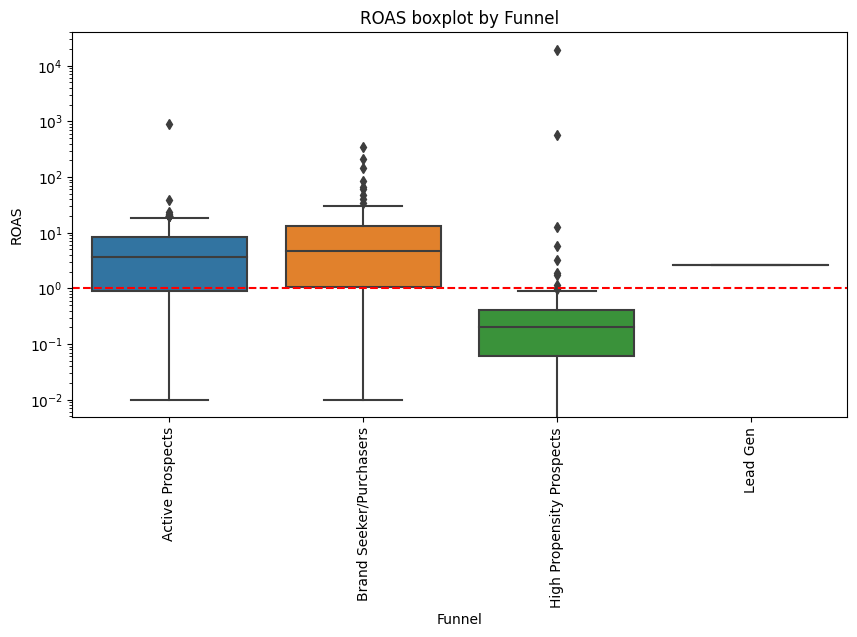

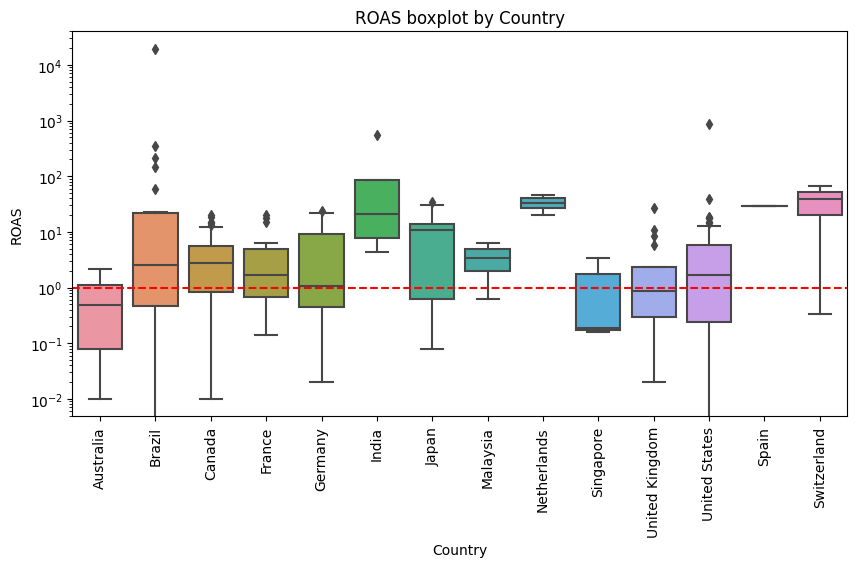

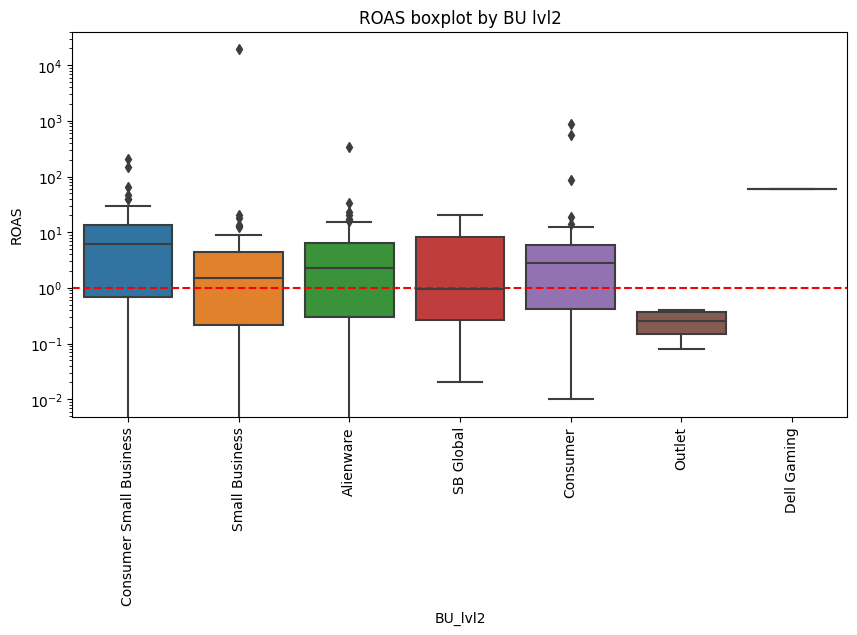

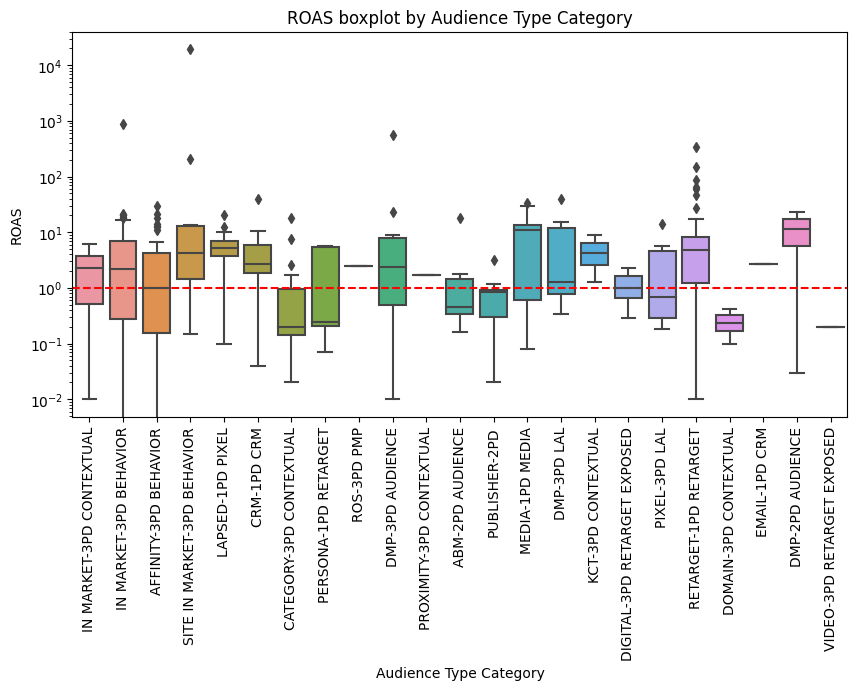

In [3]:
csv_file = "csv/Audience Report Formatted.csv"

df = read_and_preprocess_data(csv_file)

grouped_df = filter_and_group_data(df)

# Box plots by different factors
plot_boxplot(grouped_df, 'Funnel', 'ROAS', 'ROAS boxplot by Funnel')
plot_boxplot(grouped_df, 'Country', 'ROAS', 'ROAS boxplot by Country')
plot_boxplot(grouped_df, 'BU_lvl2', 'ROAS', 'ROAS boxplot by BU lvl2')
plot_boxplot(grouped_df, 'Audience Type Category', 'ROAS', 'ROAS boxplot by Audience Type Category')